<a href="https://colab.research.google.com/github/ndb796/AI-Theory-and-Practical-Project/blob/master/Linear%20Regression%20%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0%20%EA%B5%AC%ED%98%84(Bias%20%ED%8F%AC%ED%95%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression 바닥부터 구현(Bias 포함)

* Linear Regression을 Python만을 이용하여 구현합니다.

학습 목적의 데이터 준비

|하루 노동 시간| 하루 매출 |
|:--------|:--------:|
| 1 | 25,000 |
| 2 | 55,000 |
| 3 | 75,000 |
| 4 | 110,000 |
| 5 | 128,000 |
| 6 | 155,000 |
| 7 | 180,000 |

* 목표: 하루 노동 시간이 8시간일 때 하루 매출은 얼마가 될까?

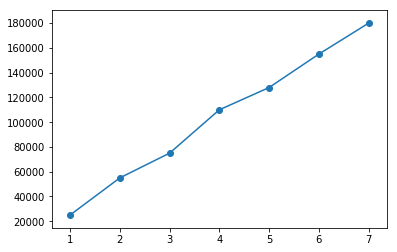

In [9]:
import matplotlib.pyplot as plt

X = [1, 2, 3, 4, 5, 6, 7]
Y = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

plt.plot(X, Y)
plt.scatter(X, Y)

In [0]:
# 가설 (학습 시킬 대상)
class H():
    def __init__(self, w, b):
        self.w = w
        self.b = b
    # 결과를 반환하는 함수
    def forward(self, x):
        return self.w * x + self.b
    # 가설의 비용을 구하는 함수 (낮추어야 할 대상)
    def get_cost(self, X, Y):
        cost = 0
        for i in range(len(X)):
            cost += (self.forward(X[i]) - Y[i]) ** 2
        cost = cost / len(X)
        return cost
    # 미분으로 기울기를 계산하는 함수
    def get_gradient_using_derivative(self, X, Y):
        w_gradient = 0
        b_gradient = 0
        for i in range(len(X)):
            w_gradient += (self.forward(X[i]) - Y[i]) * X[i]
            b_gradient += (self.forward(X[i]) - Y[i])
        w_gradient = 2 * w_gradient / len(X)
        b_gradient = 2 * b_gradient / len(X)
        return w_gradient, b_gradient, self.get_cost(X, Y)
    # w 값을 변경하는 함수
    def set_w(self, w):
        self.w = w
    # w 값을 반환하는 함수
    def get_w(self):
        return self.w
    # b 값을 변경하는 함수
    def set_b(self, b):
        self.b = b
    # b 값을 반환하는 함수
    def get_b(self):
        return self.b

In [26]:
w = 4
b = 0
h = H(w, b)
learning_rate = 0.001
    
for i in range(10001):
    w_gradient, b_gradient, cost = h.get_gradient_using_derivative(X, Y)
    h.set_w(h.get_w() + learning_rate * -w_gradient)
    h.set_b(h.get_b() + learning_rate * -b_gradient)
    if i % 1000 == 0:
        print("[ epoch: %d, cost: %.2f ]" % (i, cost))
        print("w = %.2f, w_gradient = %.2f" % (h.get_w(), w_gradient))
        print("b = %.2f, b_gradient = %.2f" % (h.get_b(), b_gradient))
        
print("f(x) = %.2fx + %.2f" %(h.get_w(), h.get_b()))
print("예측값: [%.2f]" %(h.forward(8)))

[ epoch: 0, cost: 13450708891.43 ]
w = 1040.98, w_gradient = -1036982.86
b = 207.97, b_gradient = -207968.00
[ epoch: 1000, cost: 9835710.05 ]
w = 25147.86, w_gradient = -190.39
b = 3879.77, b_gradient = 942.78
[ epoch: 2000, cost: 9190190.40 ]
w = 25305.88, w_gradient = -129.61
b = 3097.25, b_gradient = 641.81
[ epoch: 3000, cost: 8891034.74 ]
w = 25413.46, w_gradient = -88.23
b = 2564.54, b_gradient = 436.92
[ epoch: 4000, cost: 8752395.88 ]
w = 25486.69, w_gradient = -60.06
b = 2201.89, b_gradient = 297.44
[ epoch: 5000, cost: 8688145.94 ]
w = 25536.55, w_gradient = -40.89
b = 1955.02, b_gradient = 202.48
[ epoch: 6000, cost: 8658370.34 ]
w = 25570.48, w_gradient = -27.84
b = 1786.96, b_gradient = 137.84
[ epoch: 7000, cost: 8644571.32 ]
w = 25593.59, w_gradient = -18.95
b = 1672.54, b_gradient = 93.84
[ epoch: 8000, cost: 8638176.39 ]
w = 25609.32, w_gradient = -12.90
b = 1594.66, b_gradient = 63.88
[ epoch: 9000, cost: 8635212.76 ]
w = 25620.02, w_gradient = -8.78
b = 1541.64, b_g

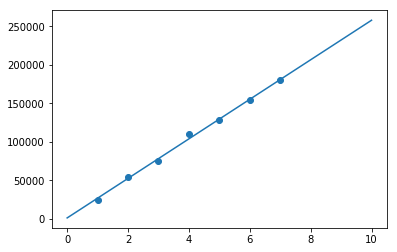

In [16]:
x_pred = [i for i in range(11)]
y_pred = [h.get_w() * i + h.get_b() for i in range(11)]
plt.plot(x_pred, y_pred)
plt.scatter(X, Y)